In [1]:
import json
from preprocessor.preprocessor_pytorch import Preprocessor
from model.model_pytorch import Model
from postprocessor.postprocessor import Postprocesser
from evaluator.evaluator_pytorch import Evaluator
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm
import os
import time
import pickle

class ReversePrediction():
    def set_seed(self, seed_value):
        np.random.seed(seed_value)
        tf.random.set_seed(seed_value)
        random.seed(seed_value)
        torch.manual_seed(seed_value)


    def run(self, params):
        self.set_seed(42)
        preprocessor = Preprocessor(params)
        X_train, y_train, X_val, y_val, X_test, y_test, test_dates, X_newest, x_newest_date, y_newest_date, target_symbol_data, y_train_transition_log, y_val_transition_log, y_test_transition_log = preprocessor.get_multiple_data()
        start_time = time.time()
        model_wrapper = Model(params=params)
        model, history, y_preds, online_training_losses, online_training_acc = \
            model_wrapper.run(X_train, y_train, X_test, y_test, X_val, y_val)
        end_time = time.time()
        execution_time = end_time - start_time
        y_preds = torch.tensor(y_preds, dtype=torch.float32)
        y_preds_original = y_preds.clone()
        y_pred_newest = model.forward(X_newest)
        y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)
        postprocessor = Postprocesser()

        y_test_max_indices = np.argmax(y_test, axis=-1)
        y_preds_max_indices = np.argmax(y_preds, axis=-1)
        y_pred_newest_max_indices = np.argmax(y_pred_newest, axis=-1)
            
        if params["filter_reverse_trend_preds"] == "True":
            y_preds_max_indices = postprocessor.change_values_after_first_reverse_point(y_preds_max_indices)
            
        if params["filter_reverse_trend_preds"] == "True":
            y_pred_newest_max_indices = postprocessor.change_values_after_first_reverse_point(y_pred_newest_max_indices)
            
            test_trade_signals = postprocessor.process_signals(y_test_max_indices, test_dates, False)
        pred_trade_signals = postprocessor.process_signals(y_preds_max_indices, test_dates, params['filter'])
        newest_trade_signals = postprocessor.process_signals(y_pred_newest_max_indices, y_newest_date, False)

        # Get first trend reversal signals
        test_signal = postprocessor.get_first_trend_reversal_signals(y_test_max_indices)
        pred_signal = postprocessor.get_first_trend_reversal_signals(y_preds_max_indices)
        evaluator = Evaluator(params=params)
        model_summary, trend_confusion_matrix_info, reversed_trend_confusion_matrix_info, signal_confusion_matrix_info, \
            roc_auc, pred_days_difference_results, pred_days_difference_abs_mean, pred_in_advance, backtesting_report, trade_summary, execution_time = \
            evaluator.generate_numericale_data(model, y_test, y_preds, test_signal, pred_signal, test_trade_signals, pred_trade_signals, target_symbol_data, execution_time)

        evaluator.get_plots(y_test, y_preds, y_preds_original, test_trade_signals, pred_trade_signals, target_symbol_data, history, online_training_acc, online_training_losses, pred_days_difference_results, pred_days_difference_abs_mean, pred_in_advance, y_test_max_indices, y_preds_max_indices, pred_signal, test_signal, show='False')

        return model_summary, trend_confusion_matrix_info, reversed_trend_confusion_matrix_info, signal_confusion_matrix_info, \
            roc_auc, pred_days_difference_results, pred_days_difference_abs_mean, pred_in_advance, backtesting_report, trade_summary, execution_time


ModuleNotFoundError: No module named 'torch'

In [ ]:
with open('parameters.json', 'r') as f:
    params = json.load(f)

In [ ]:
rp = ReversePrediction() 
rp.set_seed(42)
model_summary, trend_confusion_matrix_info, reversed_trend_confusion_matrix_info, signal_confusion_matrix_info, \
            roc_auc, pred_days_difference_results, pred_days_difference_abs_mean, pred_in_advance, backtesting_report, trade_summary, execution_time = rp.run(params)

[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:97: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_050

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Training set shape: torch.Size([212, 64, 30])
Validation set shape: torch.Size([7, 64, 30])
Test set shape: torch.Size([44, 64, 30])


  1%|          | 10/1000 [00:00<01:06, 14.93it/s]
C:\Users\e4903\AppData\Local\Temp\ipykernel_4376\1317325513.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\evaluator\evaluator_pytorch.py:287: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buy_signals = trade_signals.loc[x_start:x_stop][(
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\evaluator\evaluator_pytorch.py:296: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sell_signals = trade_signals.loc[x_start:x_stop][(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
preprocessor = Preprocessor(params)
X_train, y_train, X_val, y_val, X_test, y_test, test_dates, X_newest, x_newest_date, y_newest_date, target_symbol_data, y_train_transition_log, y_val_transition_log, y_test_transition_log = preprocessor.get_multiple_data()


[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:97: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_050

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:93: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 0
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:90: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\preprocessor\preprocessor_pytorch.py:100: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[prev_idx:idx, 'Trend'] = 1
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_05

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Training set shape: torch.Size([212, 64, 30])
Validation set shape: torch.Size([7, 64, 30])
Test set shape: torch.Size([44, 64, 30])


In [ ]:
start_time = time.time()
model_wrapper = Model(params=params)
model, history, y_preds, online_training_losses, online_training_acc = \
    model_wrapper.run(X_train, y_train, X_test, y_test, X_val, y_val)
end_time = time.time()
execution_time = end_time - start_time


  1%|          | 10/1000 [00:00<00:43, 22.86it/s]


In [ ]:
y_preds = torch.tensor(y_preds, dtype=torch.float32)
y_preds_original = y_preds.clone()

In [ ]:
y_pred_newest = model.forward(X_newest)
y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)


C:\Users\e4903\AppData\Local\Temp\ipykernel_4376\2604493356.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)


In [ ]:
postprocessor = Postprocesser()

y_test_max_indices = np.argmax(y_test, axis=-1)
y_preds_max_indices = np.argmax(y_preds, axis=-1)
y_pred_newest_max_indices = np.argmax(y_pred_newest, axis=-1)
    
if params["filter_reverse_trend_preds"] == "True":
    y_preds_max_indices = postprocessor.change_values_after_first_reverse_point(y_preds_max_indices)
    
if params["filter_reverse_trend_preds"] == "True":
    y_pred_newest_max_indices = postprocessor.change_values_after_first_reverse_point(y_pred_newest_max_indices)
    


In [ ]:
test_trade_signals = postprocessor.process_signals(y_test_max_indices, test_dates, False)
pred_trade_signals = postprocessor.process_signals(y_preds_max_indices, test_dates, params['filter'])
newest_trade_signals = postprocessor.process_signals(y_pred_newest_max_indices, y_newest_date, False)

In [ ]:
# Get first trend reversal signals
test_signal = postprocessor.get_first_trend_reversal_signals(y_test_max_indices)
pred_signal = postprocessor.get_first_trend_reversal_signals(y_preds_max_indices)


In [ ]:
evaluator = Evaluator(params=params)
model_summary, trend_confusion_matrix_info, reversed_trend_confusion_matrix_info, signal_confusion_matrix_info, \
    roc_auc, pred_days_difference_results, pred_days_difference_abs_mean, pred_in_advance, backtesting_report, trade_summary, execution_time = \
    evaluator.generate_numericale_data(model, y_test, y_preds, test_signal, pred_signal, test_trade_signals, pred_trade_signals, target_symbol_data, execution_time)

# with open('parameters.json', 'r') as f:
#     params = json.load(f)
    
# rp = ReversePrediction()
# model_summary, pred_days_difference_results, backtesting_report, trade_summary, execution_time, confusion_matrix_info, y_test, y_preds, test_trade_signals, pred_trade_signals = rp.run(
    # params)

trend_confusion_matrix_info = trend_confusion_matrix_info.to_json()
reversed_trend_confusion_matrix_info = reversed_trend_confusion_matrix_info.to_json()
signal_confusion_matrix_info = signal_confusion_matrix_info.to_json()
roc_auc_json = json.dumps(roc_auc)
model_summary_json = json.dumps(model_summary)
backtesting_report_json = json.dumps(backtesting_report)
pred_days_difference_results_json = pred_days_difference_results.to_json()
pred_days_difference_abs_mean_json = json.dumps(pred_days_difference_abs_mean)
pred_in_advance_json = json.dumps(pred_in_advance)
trade_summary_json = json.dumps(trade_summary)
execution_time_json = json.dumps(execution_time)
newest_trade_signals_json = newest_trade_signals.to_json()

response = {
    'msg': 'Received!',
    'usingData': params,
    'model_summary': model_summary_json,
    'trend_confusion_matrix_info': trend_confusion_matrix_info,
    'reversed_trend_confusion_matrix_info': reversed_trend_confusion_matrix_info,
    'signal_confusion_matrix_info': signal_confusion_matrix_info,
    'roc_auc': roc_auc_json,
    'pred_days_difference_results': pred_days_difference_results_json,
    'pred_days_difference_abs_mean': pred_days_difference_abs_mean_json,
    'pred_in_advance': pred_in_advance_json,
    'backtesting_report': backtesting_report_json,
    'trade_summary': trade_summary_json,
    'execution_time': execution_time_json,
    'newest_trade_signals': newest_trade_signals_json
}

# response

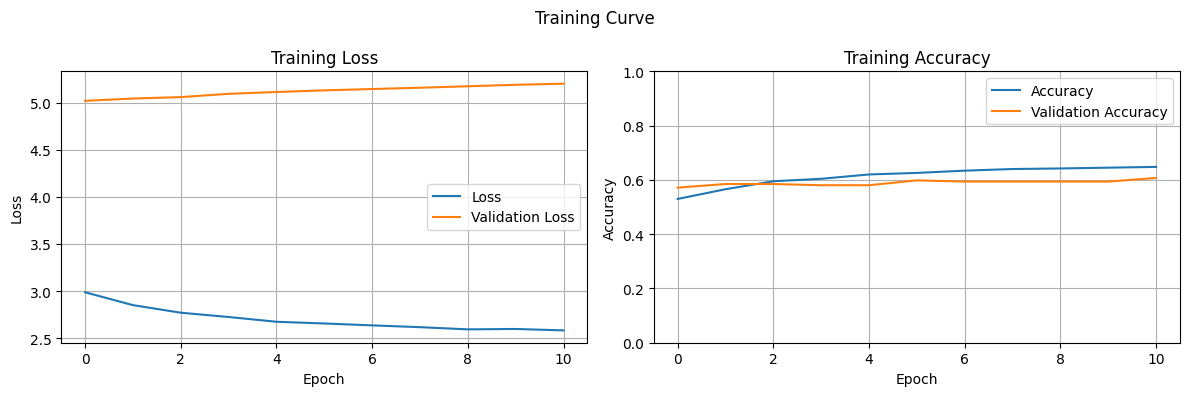

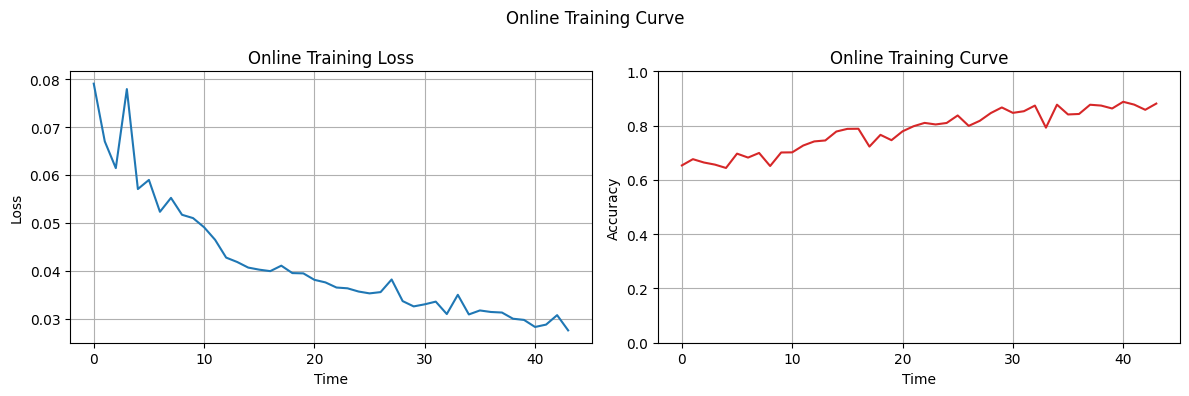

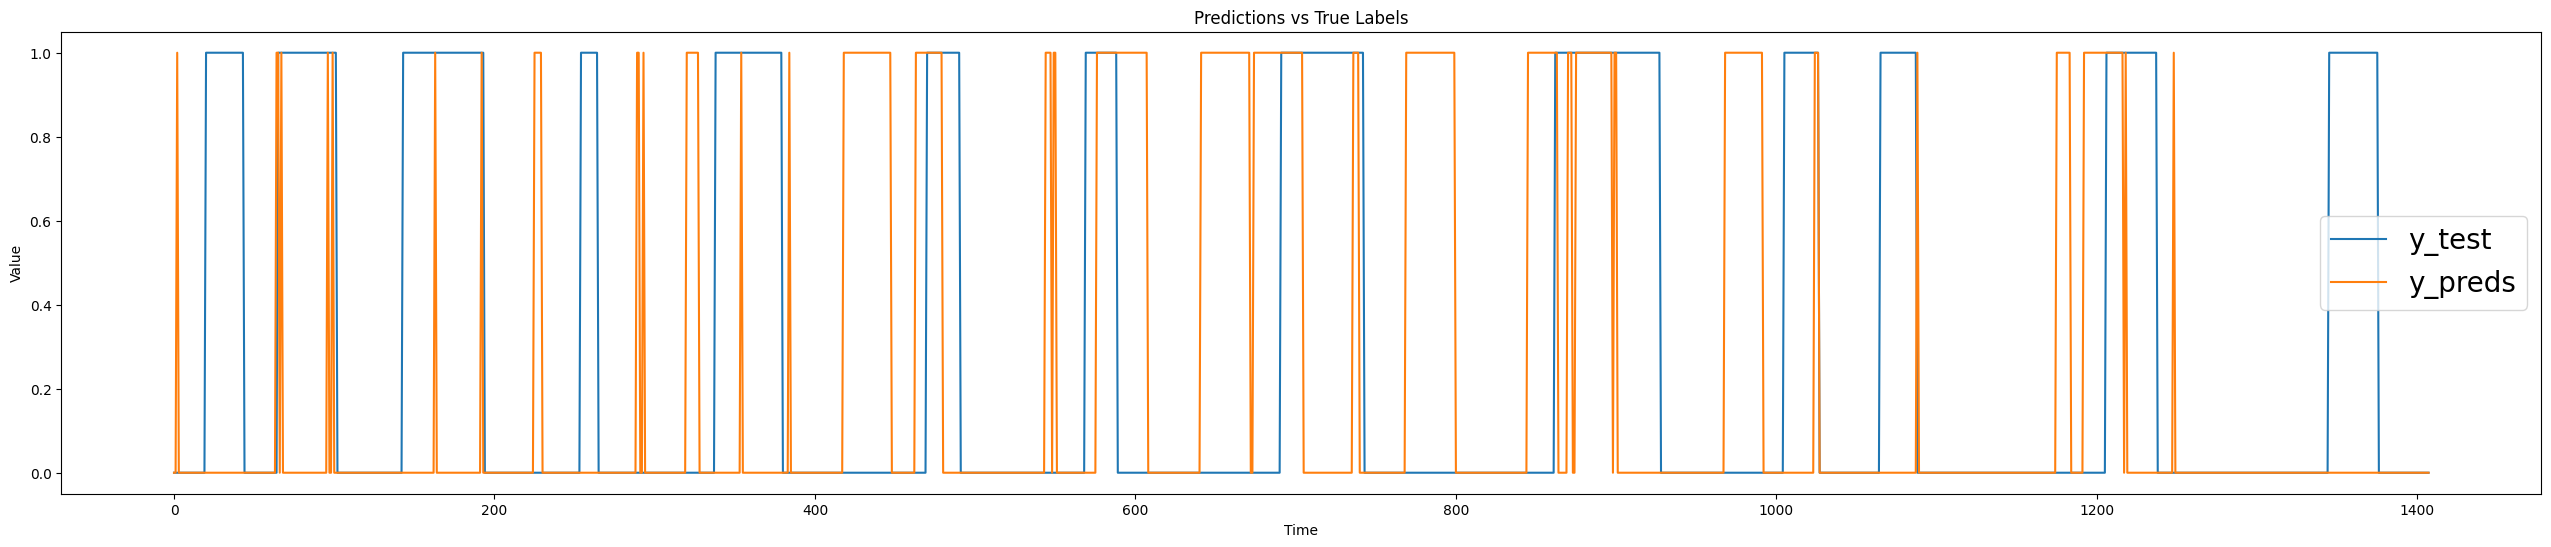

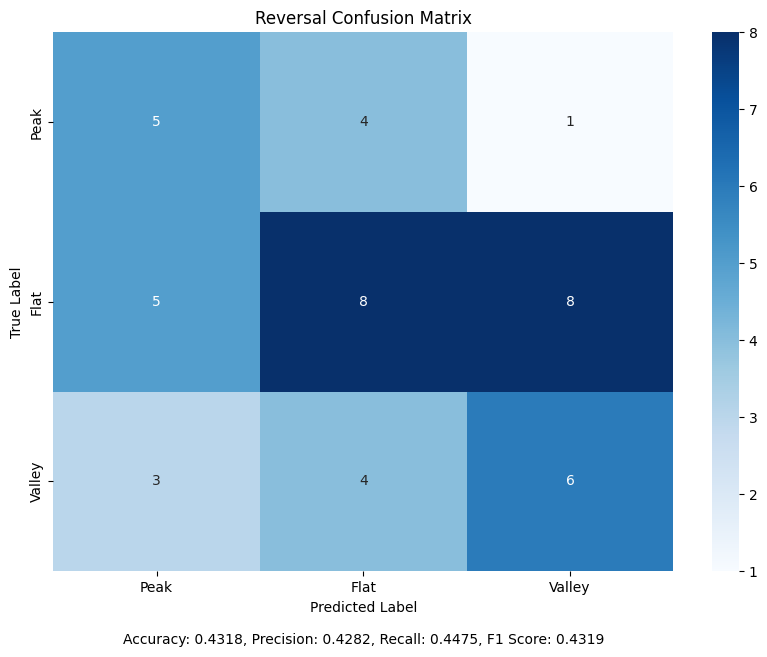

Accuracy: 0.4318
Precision: 0.4282
Recall: 0.4475
F1 Score: 0.4319


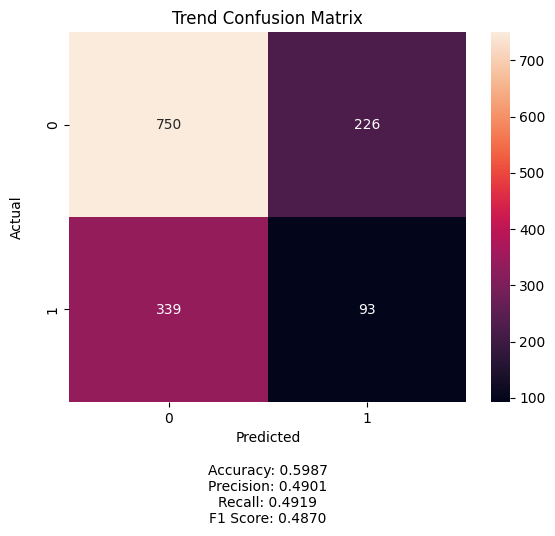

Accuracy: 0.5987
Precision: 0.4901
Recall: 0.4919
F1 Score: 0.4870


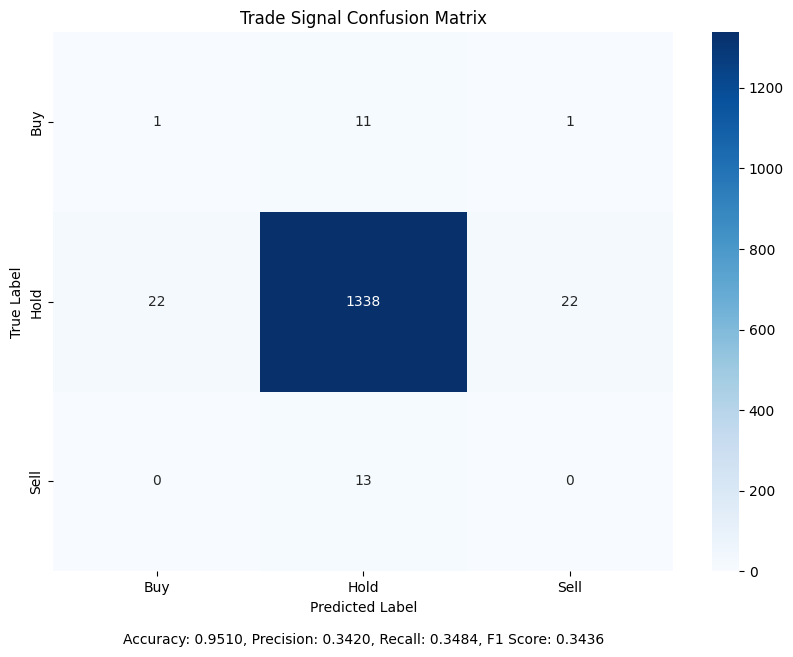

Accuracy: 0.9510
Precision: 0.3420
Recall: 0.3484
F1 Score: 0.3436


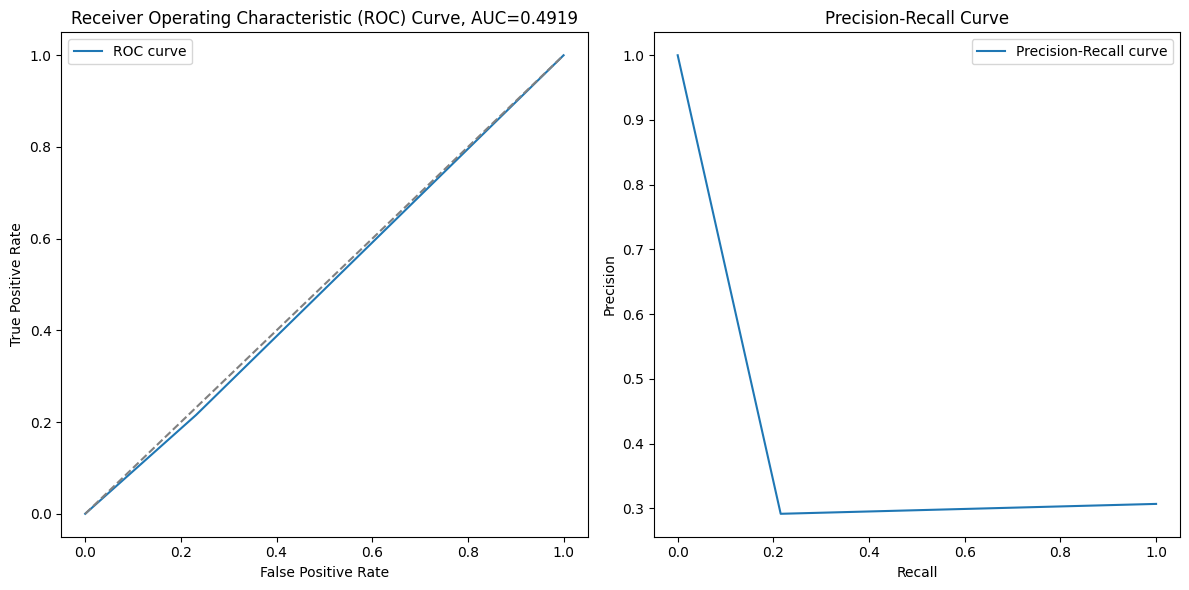

ROC AUC: 0.4919


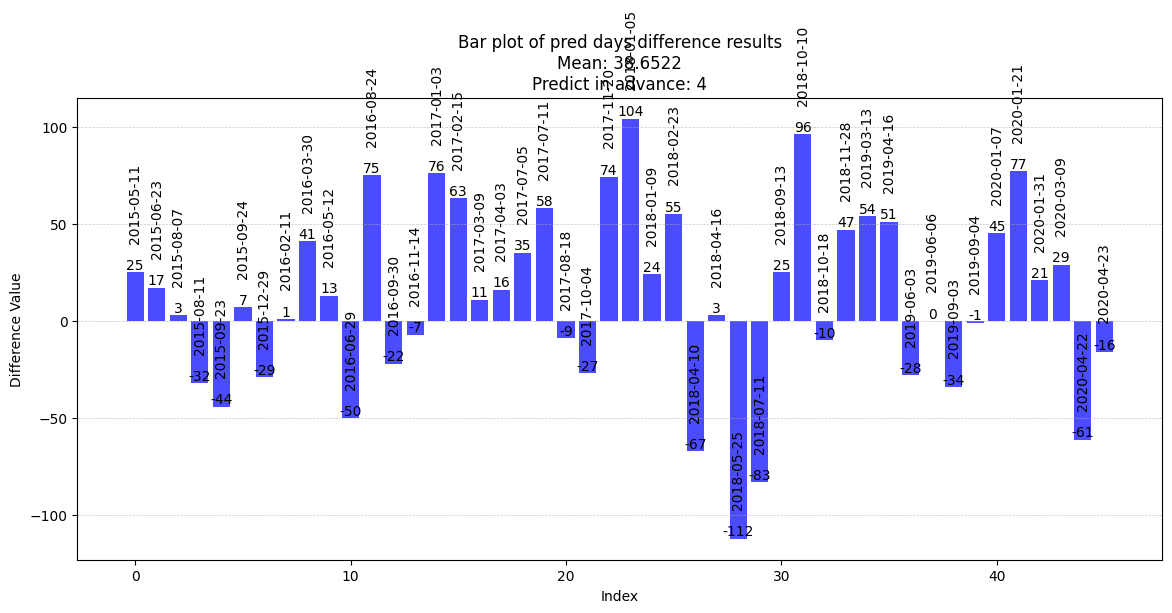

Average Difference: 38.65217391304348, Predict in advance: 4


c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\evaluator\evaluator_pytorch.py:287: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buy_signals = trade_signals.loc[x_start:x_stop][(
c:\Users\e4903\Desktop\code\2023_hw\web\reversePrediction_0509\evaluator\evaluator_pytorch.py:296: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sell_signals = trade_signals.loc[x_start:x_stop][(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


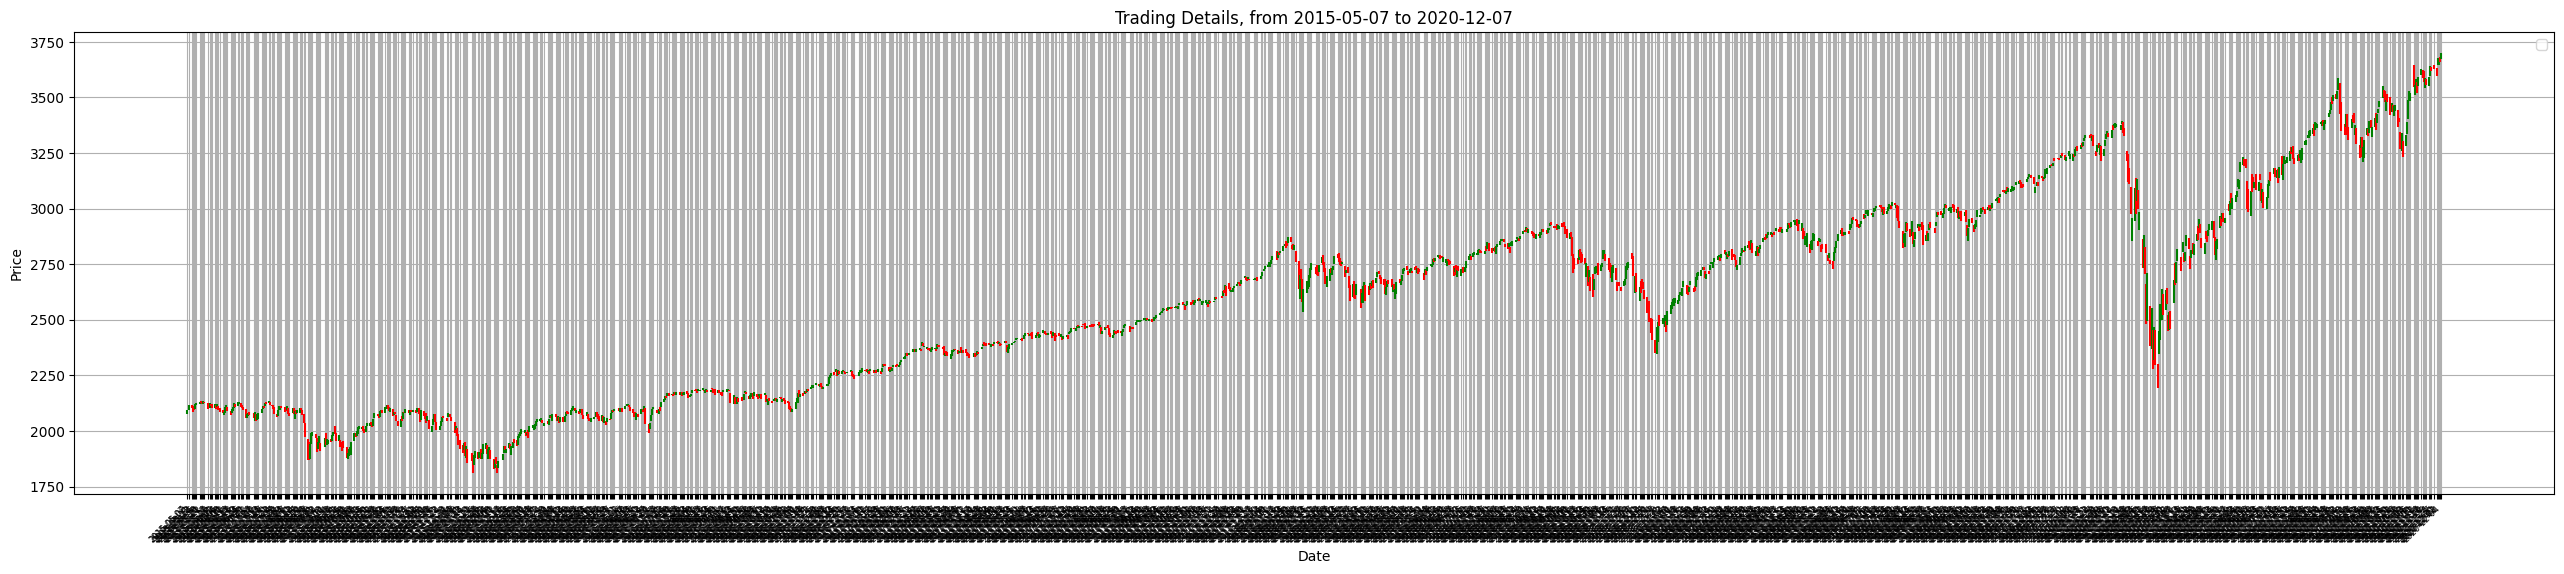

In [ ]:
evaluator.get_plots(y_test, y_preds, y_preds_original, test_trade_signals, pred_trade_signals, target_symbol_data, history, online_training_acc, online_training_losses, pred_days_difference_results, pred_days_difference_abs_mean, pred_in_advance, y_test_max_indices, y_preds_max_indices, pred_signal, test_signal, show='True')